In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

print(tf.__version__)

2.6.0


In [10]:
# Dataset Preprocessing

(X_train, y_train ) , (X_test, y_test ) = imdb.load_data(num_words = 20000)

In [14]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [15]:
y_train[:2]

array([1, 0])

In [16]:
max([len(i) for i in X_train])

2494

In [17]:
X_train = pad_sequences(X_train, maxlen = 100, padding = "pre")
X_test = pad_sequences(X_test, maxlen = 100, padding = "pre")

X_train.shape, X_test.shape

((25000, 100), (25000, 100))

In [24]:
# Build LSTM Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding


vocab_size = 20000
embed_size = 128


model = Sequential()

model.add(Embedding(input_dim = vocab_size,output_dim = embed_size , input_shape = (X_train.shape[1],)))
model.add(LSTM(units = 60 , activation = "tanh"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/5
196/196 [==============================] - 51s 249ms/step - loss: 0.4334 - accuracy: 0.7908 - val_loss: 0.3595 - val_accuracy: 0.8462
Epoch 2/5
196/196 [==============================] - 48s 246ms/step - loss: 0.2271 - accuracy: 0.9119 - val_loss: 0.3441 - val_accuracy: 0.8516
Epoch 3/5
196/196 [==============================] - 48s 247ms/step - loss: 0.1424 - accuracy: 0.9496 - val_loss: 0.4997 - val_accuracy: 0.8309
Epoch 4/5
196/196 [==============================] - 48s 246ms/step - loss: 0.0958 - accuracy: 0.9651 - val_loss: 0.5900 - val_accuracy: 0.8321
Epoch 5/5
196/196 [==============================] - 48s 245ms/step - loss: 0.0664 - accuracy: 0.9771 - val_loss: 0.5445 - val_accuracy: 0.8259


In [26]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1),history.history["loss"],label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [27]:
def confusion_graph(y_true, y_pred, classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, cbar = False, cmap = "viridis", annot_kws= {"size" : 15}, fmt = "d", xticklabels=classes , yticklabels = classes )
    
    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix" , fontsize = size)

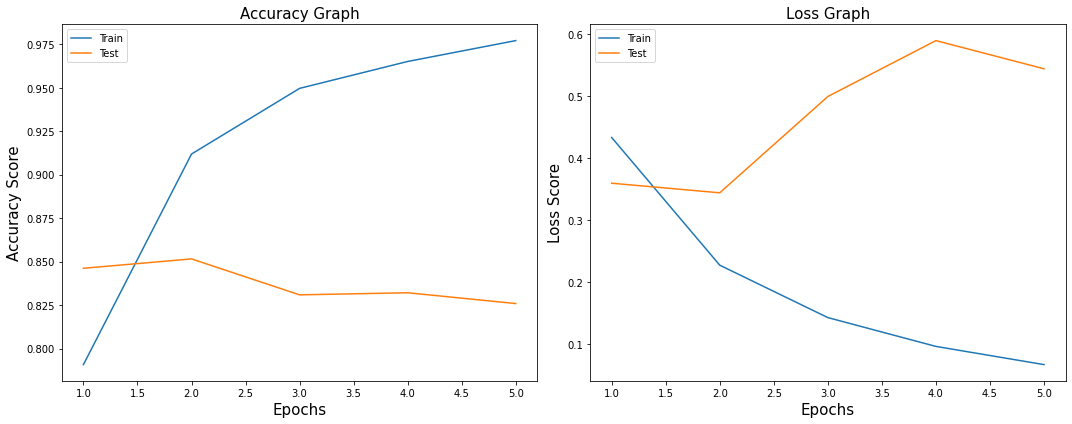

In [28]:
history_graph(history, epochs = 5)

In [31]:
y_pred = model.predict(X_test)
y_pred = [np.round(i) for i in y_pred]
y_pred[:5]

[array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32)]

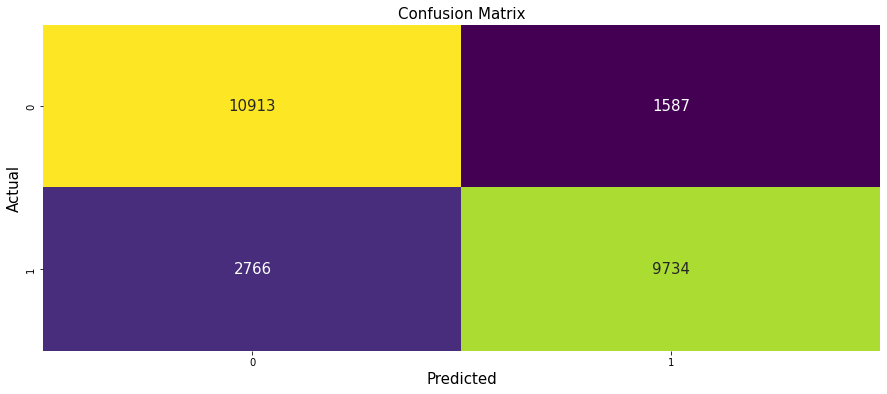

In [32]:
confusion_graph(y_test, y_pred)